In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

Saving eks_minyakBumi1.xls to eks_minyakBumi1.xls


{'eks_minyakBumi1.xls': b'\xd0\xcf\x11\xe0\xa1\xb1\x1a\xe1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00>\x00\x03\x00\xfe\xff\t\x00\x06\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00]\x00\x00\x00\x00\x00\x00\x00\x00\x10\x00\x00\xfe\xff\xff\xff\x00\x00\x00\x00\xfe\xff\xff\xff\x00\x00\x00\x00\\\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff

In [ ]:
filename = 'eks_minyakBumi1.xls'
data = pd.read_excel(filename)
data

,Negara,Tahun,Volume,Harga,Harga (per-ton)
0,Jepang,2000,10151.5,2136.7,0.210481
1,Korea Selatan,2000,5065.0,1033.8,0.204107
2,Taiwan,2000,0.0,0.0,0.000000
3,Tiongkok,2000,4483.1,927.6,0.206910
4,Thailand,2000,0.0,0.0,0.000000
...,...,...,...,...,...
225,Singapura,2022,121.8,92.0,0.755337
226,Malaysia,2022,83.7,63.2,0.755078
227,Australia,2022,218.4,159.5,0.730311
228,Amerika Serikat,2022,0.0,0.0,0.000000


In [ ]:
df = pd.DataFrame(data)
#Melihat beberapa baris pertama dataset
df.head()

,Negara,Tahun,Volume,Harga,Harga (per-ton)
0,Jepang,2000,10151.5,2136.7,0.210481
1,Korea Selatan,2000,5065.0,1033.8,0.204107
2,Taiwan,2000,0.0,0.0,0.000000
3,Tiongkok,2000,4483.1,927.6,0.206910
4,Thailand,2000,0.0,0.0,0.000000


In [ ]:
#Melihat dimensi dataset
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Negara           230 non-null    object 
 1   Tahun            230 non-null    int64  
 2   Volume           230 non-null    float64
 3   Harga            230 non-null    float64
 4   Harga (per-ton)  230 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 9.1+ KB


In [ ]:
#Melihat ringkasan statistik dataset
df.describe()

,Tahun,Volume,Harga,Harga (per-ton)
count,230.000000,230.000000,230.000000,230.000000
mean,2011.000000,1669.226522,697.116087,0.440240
std,6.647717,1876.499877,835.446159,0.222195
min,2000.000000,0.000000,0.000000,0.000000
25%,2005.000000,362.400000,176.650000,0.282128
50%,2011.000000,1077.750000,443.200000,0.436087
75%,2017.000000,2187.825000,875.500000,0.586914
max,2022.000000,10510.900000,5648.300000,0.852702


In [ ]:
df.isnull().sum()

Negara             0
Tahun              0
Volume             0
Harga              0
Harga (per-ton)    0
dtype: int64

In [ ]:
df_outlier = df[['Harga (per-ton)']]

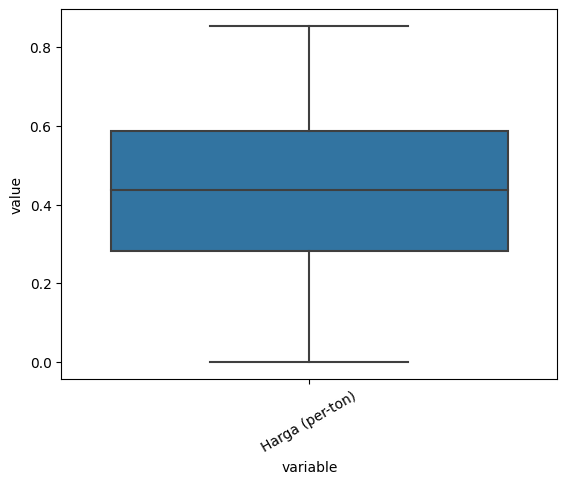

In [ ]:
sns.boxplot(x='variable', y='value', data =pd.melt(df_outlier))
plt.xticks(rotation = 30)
plt.show()

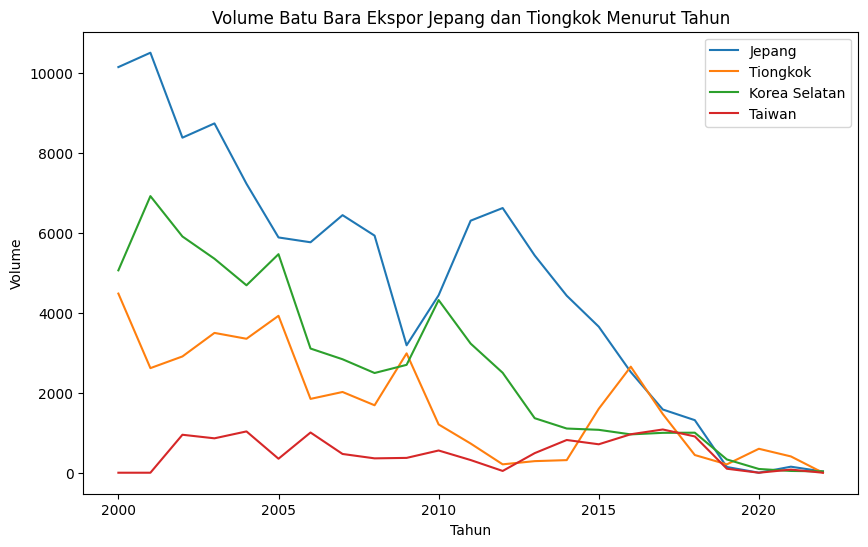

In [ ]:
df_jepang = df[df['Negara'] == 'Jepang']
df_Tiongkok = df[df['Negara'] == 'Tiongkok']
df_Korsel = df[df['Negara'] == 'Korea Selatan']
df_Taiwan = df[df['Negara'] == 'Taiwan']

# Create line charts for 'volume' and 'harga'
plt.figure(figsize=(10, 6))
plt.plot(df_jepang['Tahun'], df_jepang['Volume'], label='Jepang')
plt.plot(df_Tiongkok['Tahun'], df_Tiongkok['Volume'], label='Tiongkok')
plt.plot(df_Korsel['Tahun'], df_Korsel['Volume'], label='Korea Selatan')
plt.plot(df_Taiwan['Tahun'], df_Taiwan['Volume'], label='Taiwan')

plt.xlabel('Tahun')
plt.ylabel('Volume')
plt.title('Volume Batu Bara Ekspor Jepang dan Tiongkok Menurut Tahun')
plt.legend()
plt.show()

## Try Modelling 1

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten

In [ ]:
# Load dataset and filter for "jepang"
df_jepang = df[df["Negara"] == "Jepang"]
data_olah = df_jepang[["Tahun", "Harga (per-ton)"]]

In [ ]:
#prices = df_jepang["Harga (per-ton)"].to_numpy()

In [ ]:
df_jepang

,Negara,Tahun,Volume,Harga,Harga (per-ton)
0,Jepang,2000,10151.5,2136.7,0.210481
10,Jepang,2001,10510.9,1857.5,0.176721
20,Jepang,2002,8385.0,1572.0,0.187478
30,Jepang,2003,8741.9,1877.6,0.214782
40,Jepang,2004,7231.7,1986.1,0.274638
50,Jepang,2005,5887.9,2253.8,0.382785
60,Jepang,2006,5767.2,2647.0,0.458975
70,Jepang,2007,6445.8,3365.6,0.522138
80,Jepang,2008,5933.7,4164.9,0.701906
90,Jepang,2009,3189.0,1389.4,0.435685


In [ ]:
# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_olah[["Harga (per-ton)"]])

In [ ]:
# Split data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[0:train_size], scaled_data[train_size:]

In [ ]:
train_size

18

In [ ]:
# Create sequences for LSTM
seq_length = 5
def create_sequences(data_olah, seq_length):
    sequences = []
    for i in range(len(data_olah) - seq_length):
        sequence = data_olah[i:i + seq_length]
        sequences.append(sequence)
    return np.array(sequences)


train_sequences = create_sequences(train, seq_length)
test_sequences = create_sequences(test, seq_length)

In [ ]:
# Prepare data for CNN
#train_sequences = np.expand_dims(train_sequences, axis = 1)
#test_sequences = np.expand_dims(test_sequences, axis = 1)

In [ ]:
# Prepare data for training and testing
train_sequences = np.array(train_sequences)
test_sequences = np.array(test_sequences)

In [ ]:
test_sequences.shape

(0,)

In [ ]:
# Build CNN-LSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(seq_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 3, 64)             256       
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 lstm_8 (LSTM)               (None, 1, 128)            98816     
                                                                 
 lstm_9 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 148545 (580.25 KB)
Trainable params: 148545 (580.25 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
# Train the model
model.fit(train_sequences, train[seq_length:], epochs=100, batch_size=32, validation_data=(train_sequences, train[seq_length:]), callbacks = [callbacks])



Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.0416 - accuracy: 0.0769 - val_loss: 0.0414 - val_accuracy: 0.0769
Epoch 2/100
1/1 [==============================] - 0s 52ms/step - loss: 0.0414 - accuracy: 0.0769 - val_loss: 0.0411 - val_accuracy: 0.0769
Epoch 3/100
1/1 [==============================] - 0s 55ms/step - loss: 0.0411 - accuracy: 0.0769 - val_loss: 0.0409 - val_accuracy: 0.0769
Epoch 4/100
1/1 [==============================] - 0s 69ms/step - loss: 0.0409 - accuracy: 0.0769 - val_loss: 0.0407 - val_accuracy: 0.0769
Epoch 5/100
1/1 [==============================] - 0s 50ms/step - loss: 0.0407 - accuracy: 0.0769 - val_loss: 0.0405 - val_accuracy: 0.0769
Epoch 6/100
1/1 [==============================] - 0s 67ms/step - loss: 0.0405 - accuracy: 0.0769 - val_loss: 0.0403 - val_accuracy: 0.0769
Epoch 7/100
1/1 [==============================] - 0s 62ms/step - loss: 0.0403 - accuracy: 0.0769 - val_loss: 0.0401 - val_accuracy: 0.0769
Epoch 8/100
1/1 [=====

In [ ]:
# Train the model
predicted_prices = []
year_to_predict = [2023, 2024, 2025, 2026, 2027]
num_future_years = 4  # Adjust this parameter

# Update the prediction logic to iterate over multiple years
for i in range(num_future_years):
    future_sequence = scaled_data[-seq_length:]
    future_sequence = np.expand_dims(future_sequence, axis=0)
    future_sequence = np.expand_dims(future_sequence, axis=2)

    predicted_price = model.predict(future_sequence)[0][0]
    predicted_price = scaler.inverse_transform(np.array([[predicted_price]]))[0][0]
    predicted_prices.append(predicted_price)

    # Update the future sequence for the next year
    scaled_data = np.append(scaled_data, [predicted_price])
    scaled_data = scaled_data[1:]

1/1 [==============================] - 0s 39ms/step


In [ ]:
predicted_prices

[0.92061704, 0.8334264, 0.67216444, 0.6322166]

In [ ]:
#predicted_prices

In [ ]:
# Combine actual and predicted prices
actual_prices = data_olah["Harga (per-ton)"].values[train_size:]
all_prices = np.concatenate((actual_prices, predicted_prices))

In [ ]:
#predicted_price = scaler.inverse_transform(np.array([[predicted_price]]))[0][0]

In [ ]:
tahun_grafik = data_olah["Tahun"].to_numpy()
harga_grafik = data_olah["Harga (per-ton)"].to_numpy()

In [ ]:
#predicted_prices[0]

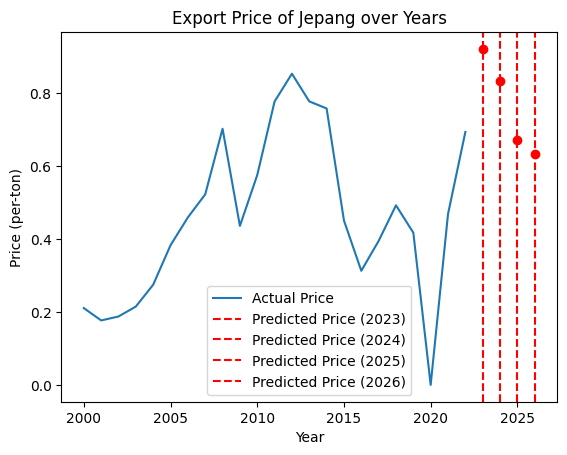

In [ ]:
#data_olah[["Harga (per-ton)"]]
# Plot actual and predicted prices
plt.plot(tahun_grafik, harga_grafik, label="Actual Price")
#plt.plot(range(2022, 2022 + 2), predicted_price)
for i in range(num_future_years):
      plt.axvline(x=year_to_predict[i], color="red", linestyle="--", label=f"Predicted Price ({year_to_predict[i]})")
      plt.scatter(year_to_predict[i], predicted_prices[i], color="red", marker="o")


# Add labels and title
plt.xlabel("Year")
plt.ylabel("Price (per-ton)")
plt.title("Export Price of Jepang over Years")

# Add legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
# Predict price for next year
#year_to_predict = [2023, 2024, 2025, 2026]   # Adjust this year
# Create a list to store the predicted prices
#predicted_prices = []

# Iterate over the years to predict
#for year in year_to_predict:
#    # Get the future sequence
#    future_sequence = scaled_data[(-(year + 1)) * seq_length:]
#    future_sequence = np.expand_dims(future_sequence, axis=0)

    # Predict the price
#    predicted_price = model.predict(future_sequence)[0, 0]

    # Scale the predicted price back to original range
#    predicted_price = np.array([[predicted_price]])

#    predicted_price = scaler.inverse_transform(predicted_price)[0, 0]



    # Add the predicted price to the list#
#    predicted_prices.append(predicted_price)


##Saved Model

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##Convert to TF.lite

In [ ]:
from tensorflow import lite

In [ ]:
#CONVERT MODEL TFLITE

model = tf.keras.models.load_model('model.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter=True
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,
tf.lite.OpsSet.SELECT_TF_OPS]

tflite_model = converter.convert()

# Save the converted model to a file
with open('converted_model.tflite', 'wb') as f:
    f.write(tflite_model)

##  Load and use the TFLite model

In [ ]:
# Load the TFLite model
interpreter = tf.lite.Interpreter("converted_model.tflite")

In [ ]:
#allocate_tensors
interpreter.allocate_tensors()

In [ ]:
# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()



In [ ]:
# Extract the last sequence
future_sequence = scaled_data[-seq_length:]

# Expand dimensions
future_sequence = np.expand_dims(future_sequence, axis=0)
future_sequence = np.expand_dims(future_sequence, axis=2)

# Ensure data type is FLOAT32
future_sequence = future_sequence.astype(np.float32)




In [ ]:
# Set input data
interpreter.set_tensor(input_details[0]['index'], future_sequence)

# Run inference
interpreter.invoke()

In [ ]:
# Get output data
output_data = interpreter.get_tensor(output_details[0]['index'])

# Inverse transform the output data
predicted_prices = scaler.inverse_transform(output_data)


In [ ]:
# Print the shape of input data
print(f"Input data shape: {input_data.shape}")


Input data shape: (1, 5, 1)


In [ ]:
print(predicted_prices)

[[0.593008]]


In [ ]:
#predicted_price = scaler.inverse_transform(np.array([[output_data]]))[0][0]


In [ ]:
#predicted_price = output_data[0]